Notebook purpose

- Document problems in MBD raw data

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('/Users/fgu/dev/projects/entropy')
import entropy.helpers.aws as aws
import entropy.data.cleaners as cl

sns.set_style('whitegrid')
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
m = aws.S3BucketManager('3di-project-entropy')
m.list()

['3di-project-entropy/entropy_000.parquet',
 '3di-project-entropy/entropy_777.parquet',
 '3di-project-entropy/entropy_X77.parquet']

## 2020 drop in user numbers

Below uses pre-processed data for entropy project, but picture is the same for raw data.

### Problem

In [3]:
df = aws.s3read_parquet('s3://3di-project-entropy/entropy_X77.parquet')

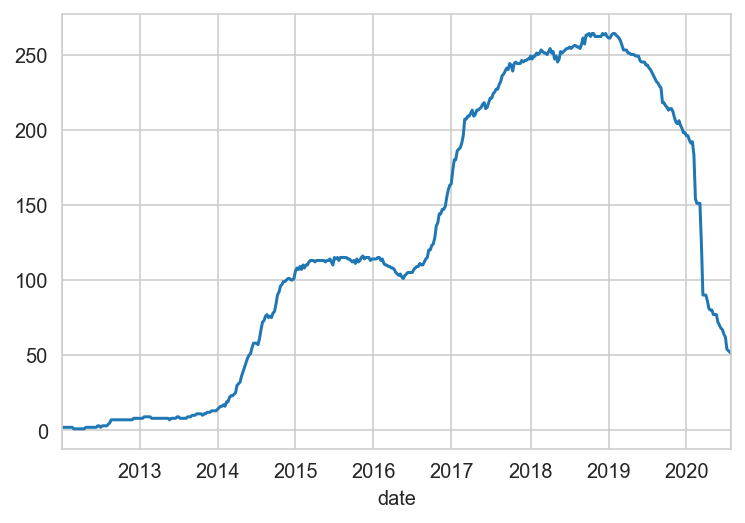

In [22]:
df.resample('w', on='date').agg({'user_id': 'nunique', 'account_id': 'nunique'}).user_id.plot();

Questions:

1. What account sfor the increase in users in 2014 and 2017? Simply widespread adoption?

2. What's behind the drop in 2019?

### Answer

- Most likely caused by introduction of new app `black`, meaning users have been switching away from old app for which we have data.

### Choosen solution